Day 2: Real-world data are not simple integers and float; Hence we need to do some pre-processing and Feature Engineering! 

Topic: Feature Engineering & Pre-processing.

Resources:

1. "What Is Feature Engineering for Machine Learning?" Amit Shekhar https://medium.com/mindorks/what-is-feature-engineering-for-machine-learning-d8ba3158d97a
2. "ML Crash Course by Google" Google Developers https://developers.google.com/machine-learning/crash-course/representation/video-lecture
3. “Categorical Data” by Dipanjan (DJ) Sarkar https://link.medium.com/aI7JKJSY54
4. “Continuous Numeric Data” by Dipanjan (DJ) Sarkar https://link.medium.com/KAuqugRY54
5. “Ways to Detect and Remove the Outliers” by Natasha Sharma https://link.medium.com/Y89PjvVY54
6. "Introduction to Feature Engineering" Ali Mustufa https://colab.research.google.com/drive/1xMEqb5n1zfXJO8_lWQsovz6ubfXDmPdU#scrollTo=2TwkLcmqX-lW

Task:

Titanic dataset cleaning+Feature Engineering and visualization only (Apply what you learned in Day1) 
Data link: https://www.kaggle.com/c/titanic/data


In [0]:
# data visualization libraries:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ml libraries
from sklearn import linear_model, preprocessing, model_selection
import numpy as np
from sklearn import tree


In [0]:
# read csv
df = pd.read_csv("http://iali.in/datasets/titanic/train.csv")


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

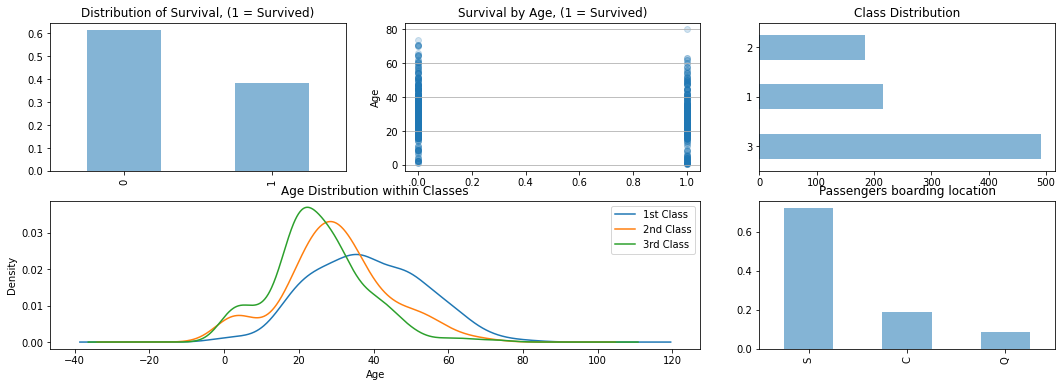

In [10]:
# configure graph
fig = plt.figure(figsize=(18,6))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# survived vs deceased
plt.subplot2grid((2,3),(0,0))
df.Survived.value_counts(normalize=True).plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Distribution of Survival, (1 = Survived)")

# survival by age
plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which="major", axis="y")
plt.title("Survival by Age, (1 = Survived)")

# class distribution
plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
plt.title("Class Distribution")

# age distribution within class
plt.subplot2grid((2,3),(1,0), colspan=2)
for x in [1,2,3]:
    df.Age[df.Pclass == x].plot(kind="kde")
plt.xlabel("Age")
plt.title("Age Distribution within Classes")
plt.legend(("1st Class", "2nd Class", "3rd Class"))

# passengers boarding location
plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts(normalize=True).plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Passengers boarding location")

plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

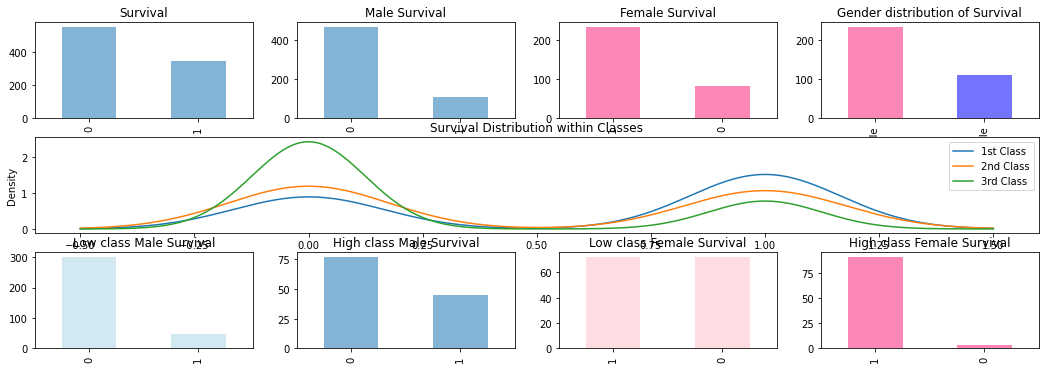

In [17]:
### Visualizing Gender

female_color = "#FA2379"

# configure graph
fig = plt.figure(figsize=(18,6))
alpha = alpha_scatterplot = 0.2
alpha_bar_chart = 0.55

# survived vs deceased
fig.add_subplot(3,4,1)
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Survival")

# male survived vs male deceased
fig.add_subplot(3,4,2)
df.Survived[df.Sex == "male"].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("Male Survival")

# female survived vs female deceased
fig.add_subplot(3,4,3)
df.Survived[df.Sex == "female"].value_counts().plot(kind='bar', color=female_color, alpha=alpha_bar_chart)
plt.title("Female Survival")

# gender distribution of survival
fig.add_subplot(3,4,4)
df[df.Survived == 1].Sex.value_counts().plot(kind='bar', color=[female_color, 'b'], alpha=alpha_bar_chart)
plt.title("Gender distribution of Survival")

# survival distribution within class
fig.add_subplot(3,1,2)
for x in [1,2,3]:
    df.Survived[df.Pclass == x].plot(kind="kde")
plt.title("Survival Distribution within Classes")
plt.legend(("1st Class", "2nd Class", "3rd Class"))

# low class male survived vs male deceased
fig.add_subplot(3,4,9)
df.Survived[(df.Sex == "male") & (df.Pclass == 3)].value_counts().plot(kind='bar', color="lightblue", alpha=alpha_bar_chart)
plt.title("Low class Male Survival")

# high class male survived vs male deceased
fig.add_subplot(3,4,10)
df.Survived[(df.Sex == "male") & (df.Pclass == 1)].value_counts().plot(kind='bar', alpha=alpha_bar_chart)
plt.title("High class Male Survival")

# low class female survived vs female deceased
fig.add_subplot(3,4,11)
df.Survived[(df.Sex == "female") & (df.Pclass == 3)].value_counts().plot(kind='bar', color="pink", alpha=alpha_bar_chart)
plt.title("Low class Female Survival")

# high class female survived vs female deceased
fig.add_subplot(3,4,12)
df.Survived[(df.Sex == "female") & (df.Pclass == 1)].value_counts().plot(kind='bar', color=female_color, alpha=alpha_bar_chart)
plt.title("High class Female Survival")

plt.show()

In [0]:
### Feature Engg

def clean_data(data):
    data["Fare"] = data["Fare"].fillna(data["Fare"].dropna().median())
    data["Age"] = data["Age"].fillna(data["Age"].dropna().median())

    data.loc[data["Sex"] == "male", "Sex"] = 0
    data.loc[data["Sex"] == "female", "Sex"] = 1

    data["Embarked"] = data["Embarked"].fillna("S")
    data.loc[data["Embarked"] == "S", "Embarked"] = 0
    data.loc[data["Embarked"] == "C", "Embarked"] = 1
    data.loc[data["Embarked"] == "Q", "Embarked"] = 2

def write_prediction(prediction, name):
    PassengerId = np.array(test["PassengerId"]).astype(int)
    solution = pd.DataFrame(prediction, PassengerId, columns = ["Survived"])
    solution.to_csv(name, index_label = ["PassengerId"])

In [21]:
train = pd.read_csv("http://iali.in/datasets/titanic/train.csv")
test = pd.read_csv("http://iali.in/datasets/titanic/test.csv")

print("\nCleaning up some data")

clean_data(train)
clean_data(test)

print("\nExtracting target and features")

print(train.shape)
target = train["Survived"].values
features = train[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values



Cleaning up some data

Extracting target and features
(891, 12)


In [22]:
### Fitting using Linear model ---> Logistic Regression

logistic = linear_model.LogisticRegression()
logistic.fit(features, target)
print(logistic.score(features, target))

0.8013468013468014


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Cross-validation: evaluating estimator performance
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test

In [45]:
scores = model_selection.cross_val_score(logistic, features, target, scoring='accuracy', cv=10)
print("Socers",scores)
print("Linear Regression Score :",scores.mean())

Socers [0.78888889 0.79775281 0.74157303 0.83146067 0.79775281 0.7752809
 0.7752809  0.76404494 0.82022472 0.78651685]
Linear Regression Score : 0.7878776529338326


In [0]:
### testing the model

test_features = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
write_prediction(logistic.predict(test_features), "logistic_regression.csv")

In [31]:
## Using polynomial Algo

print("\nUsing polynomial features")
poly = preprocessing.PolynomialFeatures(degree=2)
features_ = poly.fit_transform(features)


Using polynomial features


In [47]:
clf = linear_model.LogisticRegression(C=10)
clf.fit(features_, target)
print(clf.score(features_, target))

scores = model_selection.cross_val_score(clf, features_, target, scoring='accuracy', cv=10)
print(scores)
print("Polynomial algo score",scores.mean())

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7991021324354658


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.78888889 0.79775281 0.76404494 0.86516854 0.78651685 0.76404494
 0.80898876 0.76404494 0.83146067 0.7752809 ]
Polynomial algo score 0.7946192259675405


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [0]:
## testing
test_features_ = poly.fit_transform(test_features)
write_prediction(clf.predict(test_features_), "logistic_regression_poly.csv")

In [36]:
### Using Decision Tree

target = train["Survived"].values
features = train[["Pclass", "Sex", "Age", "Fare"]].values

decision_tree = tree.DecisionTreeClassifier(random_state = 1)
decision_tree = decision_tree.fit(features, target)

print(decision_tree.feature_importances_)
print(decision_tree.score(features, target))

[0.1269655  0.31274009 0.23147703 0.32881738]
0.9775533108866442


In [37]:
print("\nTrying on test set")

test_features = test[["Pclass", "Sex", "Age", "Fare"]].values
prediction = decision_tree.predict(test_features)
write_prediction(prediction, "decision_tree.csv")


Trying on test set


In [39]:
print("\nCorrect overfitting")

feature_names = ["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]
features_two = train[feature_names].values
decision_tree_two = tree.DecisionTreeClassifier(
    max_depth = 7,
    min_samples_split = 2,
    random_state = 1)
decision_tree_two = decision_tree_two.fit(features_two, target)

print(decision_tree_two.feature_importances_)
print(decision_tree_two.score(features_two, target))
tree.export_graphviz(decision_tree_two, feature_names=feature_names, out_file="decision_tree_two.dot")


Correct overfitting
[0.16289604 0.13683043 0.47976487 0.14661755 0.04973834 0.01414005
 0.01001273]
0.8787878787878788


In [43]:
scores = model_selection.cross_val_score(decision_tree_two, features_two, target, scoring='accuracy', cv=10)
print(scores)
print("Decison tree score:",scores.mean())

[0.74444444 0.86516854 0.73033708 0.85393258 0.88764045 0.82022472
 0.80898876 0.75280899 0.86516854 0.85393258]
Decison tree score: 0.8182646691635455


In [42]:
print("\nWrite new predicition")

test_features_two = test[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked"]].values
prediction_two = decision_tree_two.predict(test_features_two)
write_prediction(prediction_two, "decision_tree_two.csv")


Write new predicition
